In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import joblib

In [22]:
model_1=joblib.load('logistic_regression_model.pkl')
model_2=joblib.load('knn.pkl')
model_3=joblib.load('Perceptron.pkl')

In [23]:
data = pd.read_csv('data_clean.csv')
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

# Chuẩn hóa 
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [24]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [25]:
y_pred1 = model_1.predict(X_test)
y_pred2 = model_2.predict(X_test)
y_pred3 = model_3.predict(X_test)

In [26]:
#model 1
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
auc1 = roc_auc_score(y_test, y_pred1)
#model 2
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
auc2 = roc_auc_score(y_test, y_pred2)
#model 3
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
auc3 = roc_auc_score(y_test, y_pred3)

BẢNG SO SÁNH

In [27]:
# lập bảng so sánh
data1 = {
    'Model': ['Logistic_regression','KNN','PLA'],
    'Accuracy': [accuracy1, accuracy2, accuracy3],
    'Precision': [precision1, precision2, precision3],
    'Recall': [recall1, recall2, recall3],
    'F1 Score': [f1_1, f1_2, f1_3],
    'AUC': [auc1, auc2, auc3]
}

df = pd.DataFrame(data1)
df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_regression,0.895349,1.000000,0.71875,0.836364,0.859375
1,KNN,0.953488,1.000000,0.87500,0.933333,0.937500
2,PLA,0.976744,0.941176,1.00000,0.969697,0.981481


BIỂU ĐỒ SO SÁNH

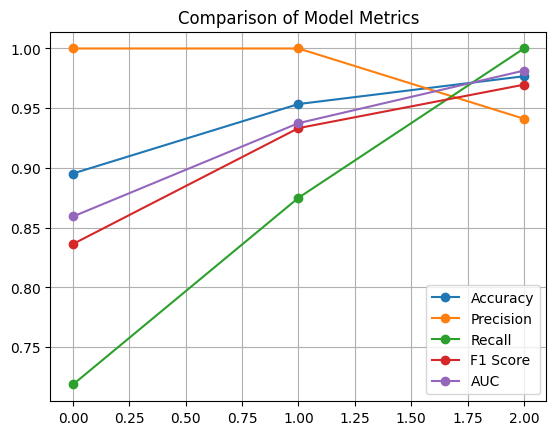

In [28]:
import matplotlib.pyplot as plt
df.plot(kind='line', marker='o')
plt.title('Comparison of Model Metrics')
plt.grid(True)
plt.show()